## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml
from joblib import dump, load

# mnist = fetch_openml('mnist_784')
# dump(mnist, 'mnist_784.joblib')

In [2]:
mnist = load('mnist_784.joblib')
X, y = mnist['data'], mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import numpy as np

X = np.array(X)
y = np.array(y)

(-0.5, 27.5, 27.5, -0.5)

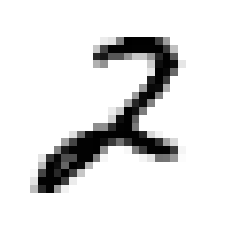

In [6]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36001]
some_digit_image = some_digit.reshape(28, 28) # lets reshape it to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [7]:
y[36001]

'2'

In [8]:
# Splitting into train & test set
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Creating a '2' detector

In [9]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [10]:
y_train

array([9, 3, 8, ..., 7, 1, 2], dtype=int8)

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train_2)

LogisticRegression(penalty='l1', solver='saga', tol=0.1)

In [12]:
clf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import cross_val_score

a = cross_val_score(clf, X_train, y_train_2, cv=3, scoring="accuracy")
a.mean()

0.9789333333333333

## Calculating confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix

y_test_pred = clf.predict(X_test)
confusion_matrix(y_test_2, y_test_pred)

array([[8924,   44],
       [ 151,  881]], dtype=int64)

## Precision and Recall

In [15]:
from sklearn.metrics import precision_score, recall_score

In [16]:
precision_score(y_test_2, y_test_pred) # This is my precision score

0.9524324324324325

In [17]:
recall_score(y_test_2, y_test_pred) # This is my recall score

0.8536821705426356

## F1 - Score

In [18]:
from sklearn.metrics import f1_score

In [19]:
f1_score(y_test_2, y_test_pred)

0.9003576903423608

## Precision Recall Curve

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

In [25]:
y_scores = cross_val_predict(clf, X_train, y_train_2, cv=3, method="decision_function")
y_scores

array([-12.76399788, -10.89758459,  -6.7351149 , ...,  -8.72169566,
        -5.15652585,   7.62106122])

In [26]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [27]:
precisions

array([0.10144903, 0.10143373, 0.10143546, ..., 1.        , 1.        ,
       1.        ])

In [28]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [29]:
thresholds

array([-16.84202032, -16.84126361, -16.83608437, ...,  14.69595585,
        15.70873049,  17.17380121])

## Plotting the Precision Recall Curve

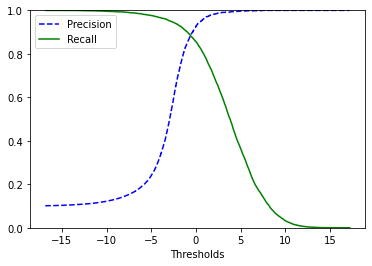

In [30]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

## Testing the model on test data

In [31]:
y_pred = clf.predict(X_test)

# number of correctly predicted labels
print("Correctly predicted labels:", np.sum(y_test_2 == y_pred), "out of", y_test_2.shape[0])

Correctly predicted labels: 9805 out of 10000


## Saving the model

In [32]:
dump(clf, 'MNIST.joblib')

['MNIST.joblib']